# Tugas Proyek Akhir Pengantar Sains Data TIF-B
Kelompok 8

* Ahmad Zaki (225150201111025)
* Arthurito Nehemia Gilbert Eduardo Luke Keintjem (225150207111047)
* Dian Pandu Syahfitra (225150200111032)

# **Adaptabilitas siswa terhadap Pendidikan Online**


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pembacaan & Pemahaman Data

In [ ]:
path = '/content/drive/My Drive/PSDKelompok8/Dataset/students_adaptability_level_online_education.csv'
df = pd.read_csv(path)

In [ ]:
df=pd.read_csv(path)
print(df)

     Gender    Age Education Level Institution Type IT Student Location  \
0       Boy  21-25      University   Non Government         No      Yes   
1      Girl  21-25      University   Non Government         No      Yes   
2      Girl  16-20         College       Government         No      Yes   
3      Girl  11-15          School   Non Government         No      Yes   
4      Girl  16-20          School   Non Government         No      Yes   
...     ...    ...             ...              ...        ...      ...   
1200   Girl  16-20         College   Non Government         No      Yes   
1201   Girl  16-20         College   Non Government         No       No   
1202    Boy  11-15          School   Non Government         No      Yes   
1203   Girl  16-20         College   Non Government         No       No   
1204   Girl  11-15          School   Non Government         No      Yes   

     Load-shedding Financial Condition Internet Type Network Type  \
0              Low            

Pengecekan data dengan beberapa fungsi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


Dapat dilihat bahwa pada data info, semua data non-null dan jumlahnya sama semua yakni 1205 yang berarti tidak ada data yang hilang ataupun terisi null

In [ ]:
descriptive_stats = df.describe().T
print(descriptive_stats)

                    count unique             top  freq
Gender               1205      2             Boy   663
Age                  1205      6           21-25   374
Education Level      1205      3          School   530
Institution Type     1205      2  Non Government   823
IT Student           1205      2              No   901
Location             1205      2             Yes   935
Load-shedding        1205      2             Low  1004
Financial Condition  1205      3             Mid   878
Internet Type        1205      2     Mobile Data   695
Network Type         1205      3              4G   775
Class Duration       1205      3             1-3   840
Self Lms             1205      2              No   995
Device               1205      3          Mobile  1013
Adaptivity Level     1205      3        Moderate   625


# 2. Data Preparation

Handling missing values

In [ ]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

Tidak ada missing value, jadi tidak dilakukan hapus baris/ isi dengan nilai
tertentu

# **Data Formatting**
pengkodean kategorikal menjadi representasi numerik

In [ ]:
df = pd.read_csv(path)

columns_to_convert = [
    'Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
    'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
    'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level'
]

for col in columns_to_convert:
    unique_values = df[col].unique()
    num_unique = len(unique_values)

    if num_unique == 2:

        df[col] = df[col].map({unique_values[0]: 0, unique_values[1]: 1})
    elif num_unique == 3:

        df[col] = df[col].map({unique_values[0]: 0, unique_values[1]: 1, unique_values[2]: 2})

    elif num_unique == 6:
        df[col]= df[col].map({unique_values[0]:0, unique_values[1]:1, unique_values[2]:2,
                              unique_values[3]:3, unique_values[4]:4, unique_values[5]:5})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


# 3. Visualisasi Data

Age vs Adaptivity Level

<Figure size 1000x600 with 0 Axes>

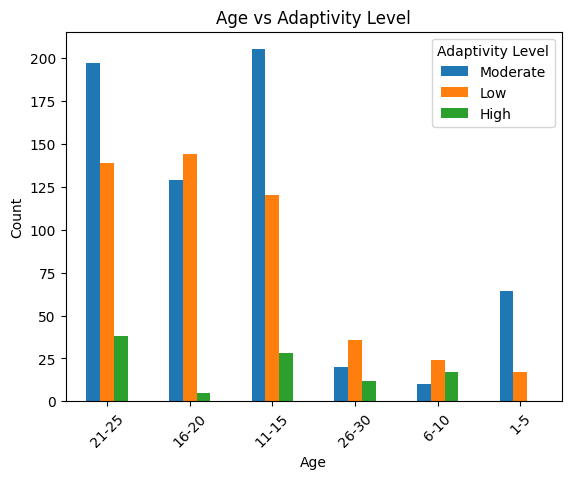

Age               1-5  11-15  16-20  21-25  26-30  6-10
Adaptivity Level                                       
High                0     28      5     38     12    17
Low                17    120    144    139     36    24
Moderate           64    205    129    197     20    10


In [ ]:
plt.figure(figsize=(10, 6))

age_labels = {0: '21-25', 1: '16-20', 2: '11-15', 3: '26-30', 4: '6-10', 5: '1-5'}
adaptivity_labels = {0: 'Moderate', 1: 'Low', 2: 'High'}

data = df.groupby(['Age', 'Adaptivity Level']).size().unstack()
data.plot(kind='bar', stacked=False)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs Adaptivity Level')
plt.xticks(ticks=range(6), labels=[age_labels[i] for i in range(6)], rotation=45)
plt.legend(title='Adaptivity Level', labels=[adaptivity_labels[i] for i in range(3)])
plt.show()

data_age = df.replace({'Age': age_labels, 'Adaptivity Level': adaptivity_labels}).groupby(['Adaptivity Level', 'Age']).size().unstack(fill_value=0)
print(data_age)


Gender vs Adaptivity Level

<Figure size 1000x600 with 0 Axes>

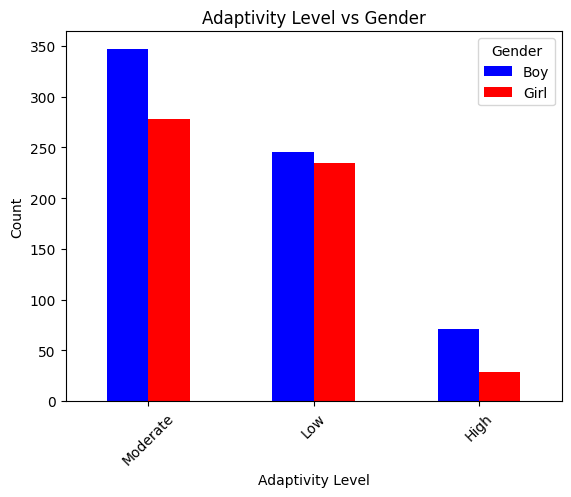

Gender            Boy  Girl
Adaptivity Level           
High               71    29
Low               245   235
Moderate          347   278


In [ ]:
plt.figure(figsize=(10, 6))

gender_labels = {0: 'Boy', 1: 'Girl'}

data_gender = df.groupby(['Adaptivity Level', 'Gender']).size().unstack()
colors = ['blue', 'red']
data_gender.plot(kind='bar', stacked=False, color=colors)

plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.title('Adaptivity Level vs Gender')
plt.xticks(ticks=range(3), labels=[adaptivity_labels[i] for i in range(3)], rotation=45)
plt.legend(title='Gender', labels=[gender_labels[i] for i in range(2)])
plt.show()

data_gender = df.replace({'Gender': gender_labels, 'Adaptivity Level': adaptivity_labels}).groupby(['Adaptivity Level', 'Gender']).size().unstack(fill_value=0)
print(data_gender)


Education Level vs Adaptivity Level

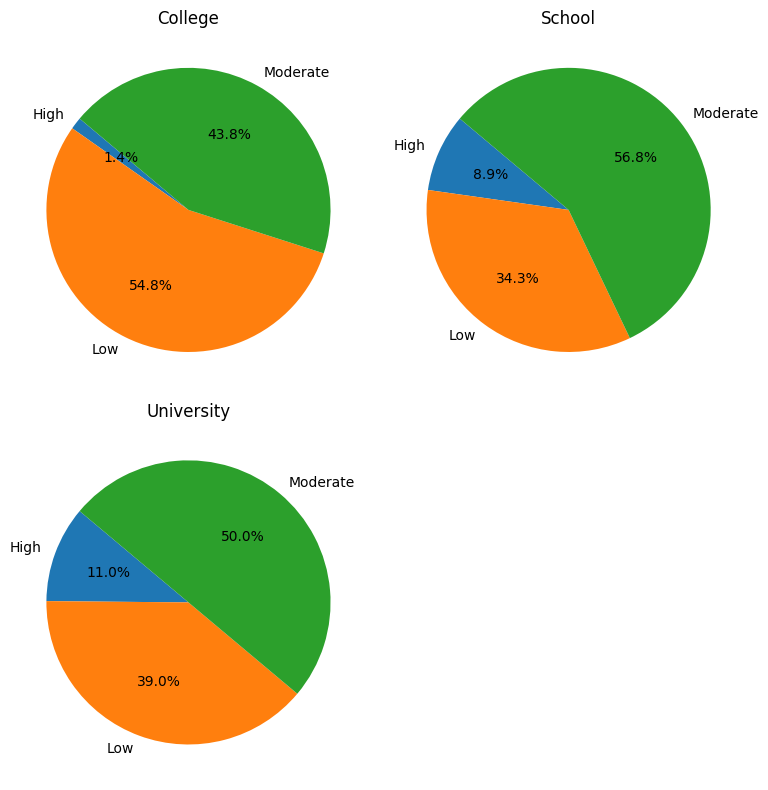

Adaptivity Level  High  Low  Moderate
Education Level                      
College              3  120        96
School              47  182       301
University          50  178       228

Adaptivity Level   High    Low Moderate
Education Level                        
College            1.4%  54.8%    43.8%
School             8.9%  34.3%    56.8%
University        11.0%  39.0%    50.0%


In [ ]:
education_labels = {0: 'University', 1: 'College', 2: 'School'}

plt.figure(figsize=(8, 8))

data_education = df.replace({'Education Level': education_labels, 'Adaptivity Level': adaptivity_labels}).groupby(['Education Level', 'Adaptivity Level']).size().unstack(fill_value=0)

total_education = data_education.sum(axis=1)

for i, education_level in enumerate(total_education.index):
    plt.subplot(2, 2, i + 1)
    plt.pie(data_education.loc[education_level], labels=data_education.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'{education_level}')

plt.tight_layout()
plt.show()

data_percentages = data_education.divide(total_education, axis=0) * 100
data_education = df.replace({'Education Level': education_labels, 'Adaptivity Level': adaptivity_labels}).groupby(['Education Level', 'Adaptivity Level']).size().unstack(fill_value=0)
print(data_education)
print('')
print(data_percentages.applymap("{:.1f}%".format))

Financial Condition vs Adaptivity Level

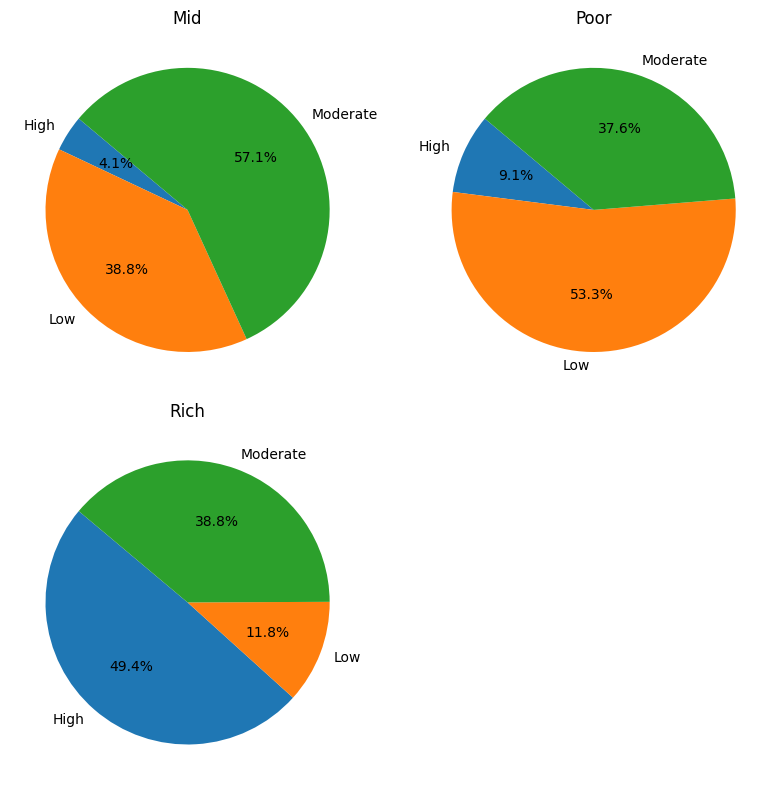

Adaptivity Level     High  Low  Moderate
Financial Condition                     
Mid                    36  341       501
Poor                   22  129        91
Rich                   42   10        33

Adaptivity Level      High    Low Moderate
Financial Condition                       
Mid                   4.1%  38.8%    57.1%
Poor                  9.1%  53.3%    37.6%
Rich                 49.4%  11.8%    38.8%


In [ ]:
financial_condition_labels = {0: 'Mid', 1: 'Poor', 2: 'Rich'}

plt.figure(figsize=(8, 8))

data_financial_condition = df.replace({'Financial Condition': financial_condition_labels, 'Adaptivity Level': adaptivity_labels}).groupby(['Financial Condition', 'Adaptivity Level']).size().unstack(fill_value=0)

total_financial_condition = data_financial_condition.sum(axis=1)

for i, financial_condition in enumerate(total_financial_condition.index):
    plt.subplot(2, 2, i + 1)
    plt.pie(data_financial_condition.loc[financial_condition], labels=data_financial_condition.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'{financial_condition}')

plt.tight_layout()
plt.show()

data_percentages = data_financial_condition.divide(total_financial_condition, axis=0) * 100
print(data_financial_condition)
print('')
print(data_percentages.applymap("{:.1f}%".format))

Internet Type vs Adaptivity Level
dan
Network Type vs Adaptivity Level

<Figure size 1000x600 with 0 Axes>

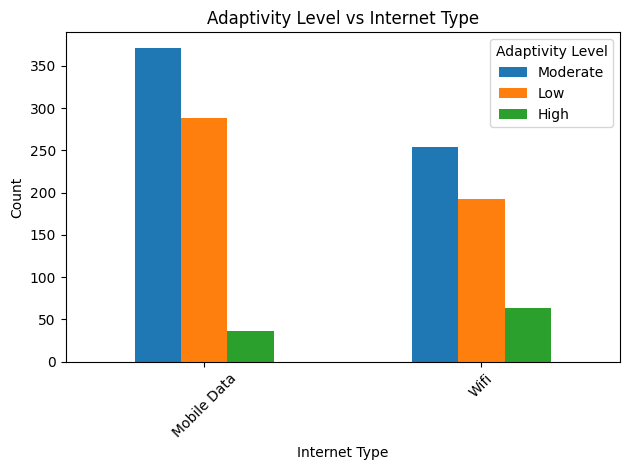


Data Internet Type:
Adaptivity Level  Moderate  Low  High
Internet Type                        
Mobile Data            371  288    36
Wifi                   254  192    64




<Figure size 1000x600 with 0 Axes>

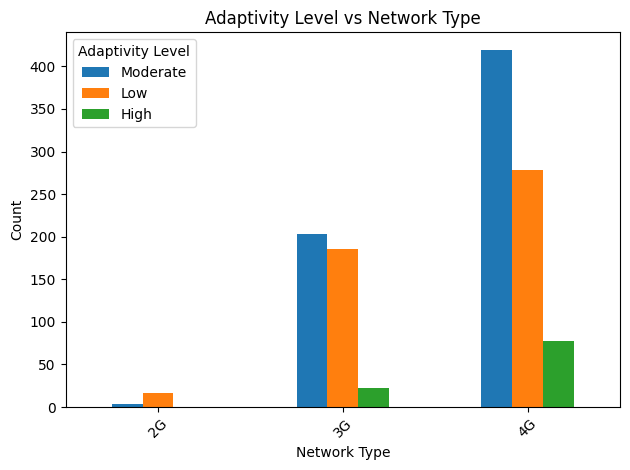


Data Network Type:
Adaptivity Level  Moderate  Low  High
Network Type                         
2G                       3   16     0
3G                     203  186    22
4G                     419  278    78


In [ ]:
internet_type_labels = {0: 'Wifi', 1: 'Mobile Data'}
network_type_labels = {0: '4G', 1: '3G', 2: '2G'}

adaptivity_order = ['Moderate', 'Low', 'High']

plt.figure(figsize=(10, 6))

data_internet_type = df.replace({'Adaptivity Level': adaptivity_labels, 'Internet Type': internet_type_labels}).groupby(['Internet Type', 'Adaptivity Level']).size().unstack(fill_value=0)
data_internet_type = data_internet_type.reindex(adaptivity_order, axis=1)

data_internet_type.plot(kind='bar', stacked=False)

plt.xlabel('Internet Type')
plt.ylabel('Count')
plt.title('Adaptivity Level vs Internet Type')
plt.xticks(rotation=45)
plt.legend(title='Adaptivity Level', labels=adaptivity_order)

plt.tight_layout()
plt.show()
print("\nData Internet Type:")
print(data_internet_type)
print('\n')


plt.figure(figsize=(10, 6))

data_network_type = df.replace({'Adaptivity Level': adaptivity_labels, 'Network Type': network_type_labels}).groupby(['Network Type', 'Adaptivity Level']).size().unstack(fill_value=0)
data_network_type = data_network_type.reindex(adaptivity_order, axis=1)

data_network_type.plot(kind='bar', stacked=False)

plt.xlabel('Network Type')
plt.ylabel('Count')
plt.title('Adaptivity Level vs Network Type')
plt.xticks(rotation=45)
plt.legend(title='Adaptivity Level', labels=adaptivity_order)

plt.tight_layout()
plt.show()

print("\nData Network Type:")
print(data_network_type)

Device vs Adaptivity Level

<Figure size 1000x600 with 0 Axes>

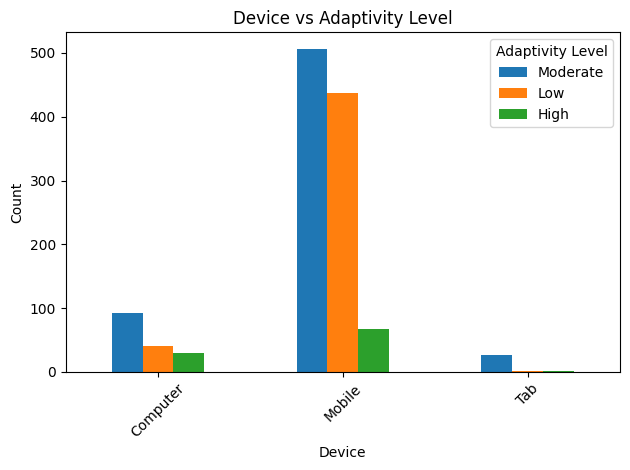


Data Device:
Adaptivity Level  Moderate  Low  High
Device                               
Computer                92   40    30
Mobile                 507  438    68
Tab                     26    2     2


In [ ]:
device_labels = {0: 'Tab', 1: 'Mobile', 2: 'Computer'}

plt.figure(figsize=(10, 6))

data_device = df.replace({'Adaptivity Level': adaptivity_labels, 'Device': device_labels}).groupby(['Device', 'Adaptivity Level']).size().unstack(fill_value=0)

data_device = data_device.reindex(adaptivity_order, axis=1)

data_device.plot(kind='bar', stacked=False)

plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Device vs Adaptivity Level')
plt.xticks(rotation=45)
plt.legend(title='Adaptivity Level', labels=adaptivity_order)

plt.tight_layout()
plt.show()

print("\nData Device:")
print(data_device)

IT Student vs Adaptivity Level

<Figure size 800x600 with 0 Axes>

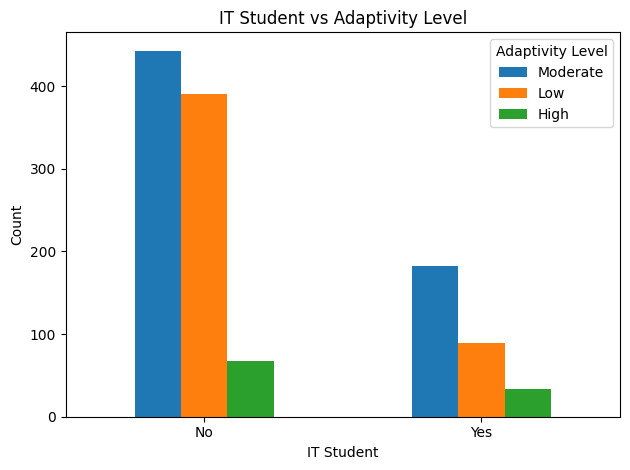


Data IT Student:
Adaptivity Level  Moderate  Low  High
IT Student                           
No                     443  391    67
Yes                    182   89    33


In [ ]:
it_student_labels = {0: 'No', 1: 'Yes'}

plt.figure(figsize=(8, 6))

data_it_student = df.replace({'Adaptivity Level': adaptivity_labels, 'IT Student': it_student_labels}).groupby(['IT Student', 'Adaptivity Level']).size().unstack(fill_value=0)

data_it_student = data_it_student.reindex(adaptivity_order, axis=1)

data_it_student.plot(kind='bar', stacked=False)

plt.xlabel('IT Student')
plt.ylabel('Count')
plt.title('IT Student vs Adaptivity Level')
plt.xticks(rotation=0)
plt.legend(title='Adaptivity Level', labels=adaptivity_order)

plt.tight_layout()
plt.show()

print("\nData IT Student:")
print(data_it_student)

Self LMS vs Adaptivity Level

<Figure size 800x600 with 0 Axes>

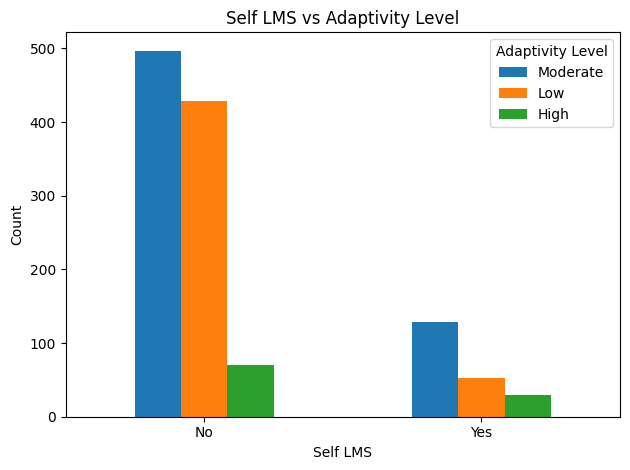


Data Self LMS:
Adaptivity Level  Moderate  Low  High
Self Lms                             
No                     497  428    70
Yes                    128   52    30


In [ ]:
self_lms_labels = {0: 'No', 1: 'Yes'}

plt.figure(figsize=(8, 6))

data_self_lms = df.replace({'Adaptivity Level': adaptivity_labels, 'Self Lms': self_lms_labels}).groupby(['Self Lms', 'Adaptivity Level']).size().unstack(fill_value=0)

data_self_lms = data_self_lms.reindex(adaptivity_order, axis=1)

data_self_lms.plot(kind='bar', stacked=False)

plt.xlabel('Self LMS')
plt.ylabel('Count')
plt.title('Self LMS vs Adaptivity Level')
plt.xticks(rotation=0)
plt.legend(title='Adaptivity Level', labels=adaptivity_order)

plt.tight_layout()
plt.show()

print("\nData Self LMS:")
print(data_self_lms)

Institution Type vs Adaptivity Level

<Figure size 800x600 with 0 Axes>

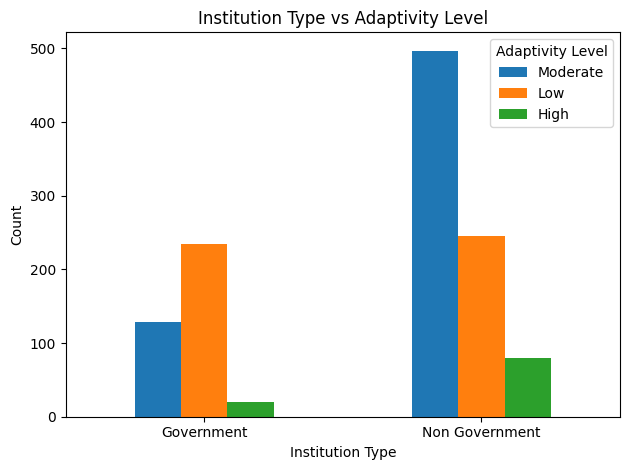


Data Institution Type:
Adaptivity Level  Moderate  Low  High
Institution Type                     
Government             128  234    20
Non Government         497  246    80


In [ ]:
institution_labels = {0:'Non Government', 1:'Government'}

plt.figure(figsize=(8, 6))

data_institution = df.replace({'Adaptivity Level': adaptivity_labels, 'Institution Type': institution_labels}).groupby(['Institution Type', 'Adaptivity Level']).size().unstack(fill_value=0)

data_institution = data_institution.reindex(adaptivity_order, axis=1)

data_institution.plot(kind='bar', stacked=False)

plt.xlabel('Institution Type')
plt.ylabel('Count')
plt.title('Institution Type vs Adaptivity Level')
plt.xticks(rotation=0)
plt.legend(title='Adaptivity Level', labels=adaptivity_order)

plt.tight_layout()
plt.show()

print("\nData Institution Type:")
print(data_institution)

# 4. **Modelling - Regression**

In [ ]:
print(df)

      Gender  Age  Education Level  Institution Type  IT Student  Location  \
0          0    0                0                 0           0         0   
1          1    0                0                 0           0         0   
2          1    1                1                 1           0         0   
3          1    2                2                 0           0         0   
4          1    1                2                 0           0         0   
...      ...  ...              ...               ...         ...       ...   
1200       1    1                1                 0           0         0   
1201       1    1                1                 0           0         1   
1202       0    2                2                 0           0         0   
1203       1    1                1                 0           0         1   
1204       1    2                2                 0           0         0   

      Load-shedding  Financial Condition  Internet Type  Networ


*    data yang telah kami ubah dari kategorikal ke numerik, kami ingin mencoba melakukan modelling dengan multiple linear regression.
*   untuk mulitple linear regresion kali ini variabel dependennya kami memakai adaptivity level dan independennya menggunakan kolom selain adaptivity level.

Mean Squared Error: 0.3404327308527574
R-squared: 0.2025218423546422


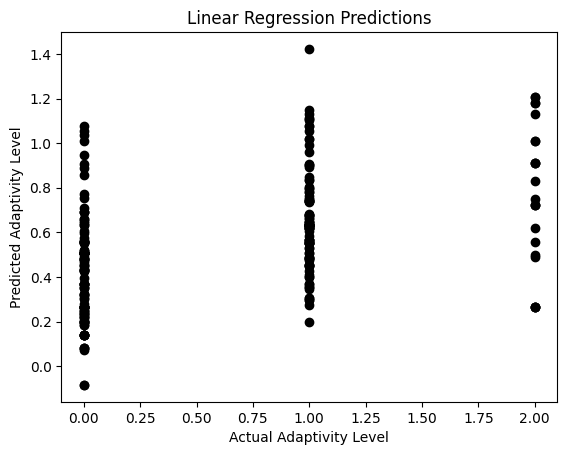

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('Adaptivity Level', axis=1)
y = df['Adaptivity Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


plt.scatter(y_test, y_pred, color='black')
plt.xlabel('Actual Adaptivity Level')
plt.ylabel('Predicted Adaptivity Level')
plt.title('Linear Regression Predictions')
plt.show()

dapat dilihat bahwa skor untuk r-squared maupun mse terlihat tidak bagus yang menandakan model kurang bagus, kami asumsikan mungkin karena kurangnya fitur yang relevan

Mean Squared Error (Polynomial): 0.296845796314887
R-squared (Polynomial): 0.30462609116056516


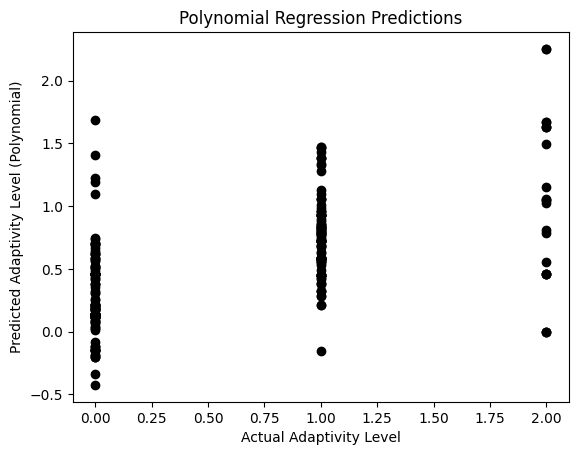

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 2

model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model_poly.fit(X_train, y_train)

y_pred_poly = model_poly.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Mean Squared Error (Polynomial): {mse_poly}")
print(f"R-squared (Polynomial): {r2_poly}")

plt.scatter(y_test, y_pred_poly, color='black')
plt.xlabel('Actual Adaptivity Level')
plt.ylabel('Predicted Adaptivity Level (Polynomial)')
plt.title('Polynomial Regression Predictions')
plt.show()


dapat dilihat bahwa nilai MSE nya rendah yang artinya sedikit kesalahan dalam prediksi model terhadap nilai target. Namun nilai R-squared nya juga rendah yang artinya model belum sepenuhnya menjelaskan variasi dalam data, artinya model mungkin tidak cocok atau ada faktor yang belum dipertimbangkan.

# 4. **Modelling - Classification**
dari hasil modelling regresi sebelumnya yang belum baik, maka kami akan melakukan classification menggunakan data yang kategorikal

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

y_test_labels = y_test.replace(adaptivity_labels)
y_pred_rf_labels = pd.Series(y_pred_rf).replace(adaptivity_labels)

accuracy_rf = accuracy_score(y_test_labels, y_pred_rf_labels)
print(f"Accuracy (Random Forest): {accuracy_rf}")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_rf_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_rf_labels))


Accuracy (Random Forest): 0.8962655601659751
Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.65      0.75        23
         Low       0.90      0.94      0.92       103
    Moderate       0.90      0.90      0.90       115

    accuracy                           0.90       241
   macro avg       0.89      0.83      0.86       241
weighted avg       0.90      0.90      0.89       241

Confusion Matrix:
[[ 15   0   8]
 [  2  97   4]
 [  0  11 104]]


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

y_test_labels = y_test.replace(adaptivity_labels)
y_pred_nb_labels = pd.Series(y_pred_nb).replace(adaptivity_labels)

accuracy_nb = accuracy_score(y_test_labels, y_pred_nb_labels)
print(f"Accuracy (Naive Bayes): {accuracy_nb}")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_nb_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_nb_labels))

Accuracy (Naive Bayes): 0.6763485477178424
Classification Report:
              precision    recall  f1-score   support

        High       0.63      0.52      0.57        23
         Low       0.75      0.58      0.66       103
    Moderate       0.64      0.79      0.71       115

    accuracy                           0.68       241
   macro avg       0.67      0.63      0.65       241
weighted avg       0.69      0.68      0.67       241

Confusion Matrix:
[[12  1 10]
 [ 2 60 41]
 [ 5 19 91]]


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ada_classifier = AdaBoostClassifier(random_state=42)

ada_classifier.fit(X_train, y_train)

y_pred_ada = ada_classifier.predict(X_test)

y_test_labels = y_test.replace(adaptivity_labels)
y_pred_ada_labels = pd.Series(y_pred_ada).replace(adaptivity_labels)

accuracy_ada = accuracy_score(y_test_labels, y_pred_ada_labels)
print(f"Accuracy (Adaboost): {accuracy_ada}")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_ada_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_ada_labels))

Accuracy (Adaboost): 0.6887966804979253
Classification Report:
              precision    recall  f1-score   support

        High       0.62      0.35      0.44        23
         Low       0.72      0.68      0.70       103
    Moderate       0.67      0.77      0.72       115

    accuracy                           0.69       241
   macro avg       0.67      0.60      0.62       241
weighted avg       0.69      0.69      0.68       241

Confusion Matrix:
[[ 8  3 12]
 [ 2 70 31]
 [ 3 24 88]]


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

y_test_labels = y_test.replace(adaptivity_labels)
y_pred_svm_labels = pd.Series(y_pred_svm).replace(adaptivity_labels)

accuracy_svm = accuracy_score(y_test_labels, y_pred_svm_labels)
print(f"Accuracy (SVM): {accuracy_svm}")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_svm_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_svm_labels))


Accuracy (SVM): 0.7551867219917012
Classification Report:
              precision    recall  f1-score   support

        High       0.77      0.43      0.56        23
         Low       0.88      0.66      0.76       103
    Moderate       0.69      0.90      0.78       115

    accuracy                           0.76       241
   macro avg       0.78      0.67      0.70       241
weighted avg       0.78      0.76      0.75       241

Confusion Matrix:
[[ 10   0  13]
 [  1  68  34]
 [  2   9 104]]


K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
y_test_labels = y_test.replace(adaptivity_labels)
y_pred_knn_labels = pd.Series(y_pred_knn).replace(adaptivity_labels)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn}")
print(f"Classification Report (KNN):")
print(classification_report(y_test_labels, y_pred_knn_labels))
print(f"Confusion Matrix (KNN):")
print(confusion_matrix(y_test_labels, y_pred_knn_labels))

Accuracy (KNN): 0.8008298755186722
Classification Report (KNN):
              precision    recall  f1-score   support

        High       0.73      0.48      0.58        23
         Low       0.84      0.82      0.83       103
    Moderate       0.78      0.85      0.81       115

    accuracy                           0.80       241
   macro avg       0.78      0.72      0.74       241
weighted avg       0.80      0.80      0.80       241

Confusion Matrix (KNN):
[[11  0 12]
 [ 3 84 16]
 [ 1 16 98]]


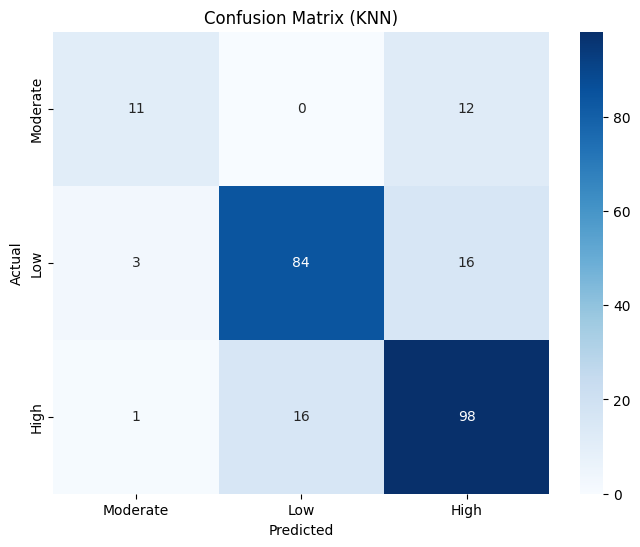

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix_knn = confusion_matrix(y_test_labels, y_pred_knn_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g',
            xticklabels=adaptivity_labels.values(), yticklabels=adaptivity_labels.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()

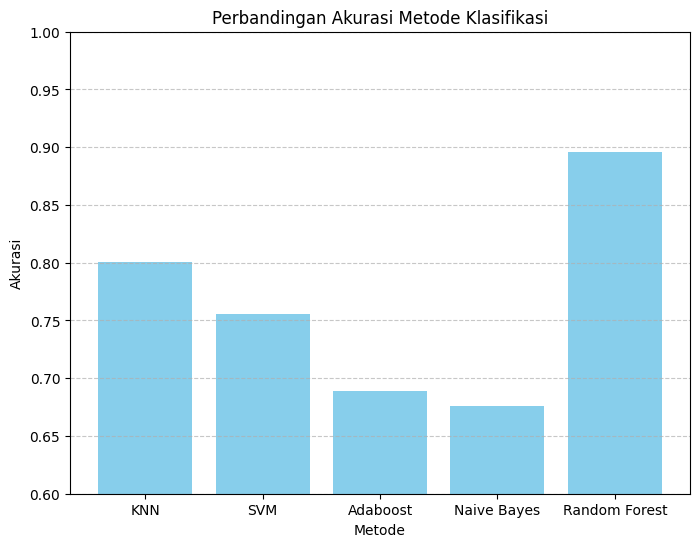

In [ ]:
accuracies = [accuracy_knn, accuracy_svm, accuracy_ada, accuracy_nb, accuracy_rf]
methods = ['KNN', 'SVM', 'Adaboost', 'Naive Bayes', 'Random Forest']

plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies, color='skyblue')
plt.xlabel('Metode')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Metode Klasifikasi')
plt.ylim(0.6, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


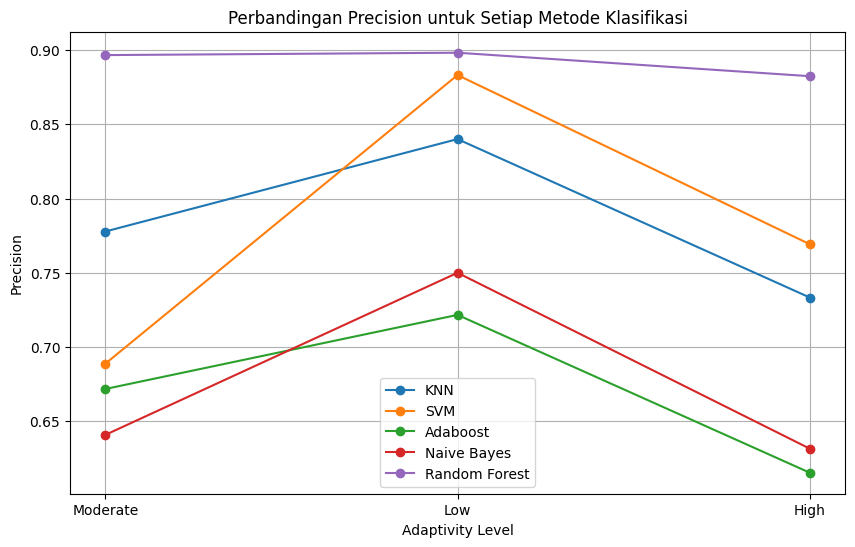

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

reports = {
    'KNN': classification_report(y_test_labels, y_pred_knn_labels, output_dict=True),
    'SVM': classification_report(y_test_labels, y_pred_svm_labels, output_dict=True),
    'Adaboost': classification_report(y_test_labels, y_pred_ada_labels, output_dict=True),
    'Naive Bayes': classification_report(y_test_labels, y_pred_nb_labels, output_dict=True),
    'Random Forest': classification_report(y_test_labels, y_pred_rf_labels, output_dict=True)
}

metric = 'precision'

values = {
    method: [reports[method][label][metric] for label in adaptivity_labels.values()] for method in reports
}

plt.figure(figsize=(10, 6))

for method, value in values.items():
    plt.plot(list(adaptivity_labels.values()), value, marker='o', label=method)

plt.xlabel('Adaptivity Level')
plt.ylabel(metric.capitalize())
plt.title(f'Perbandingan {metric.capitalize()} untuk Setiap Metode Klasifikasi')
plt.legend()
plt.grid()
plt.show()


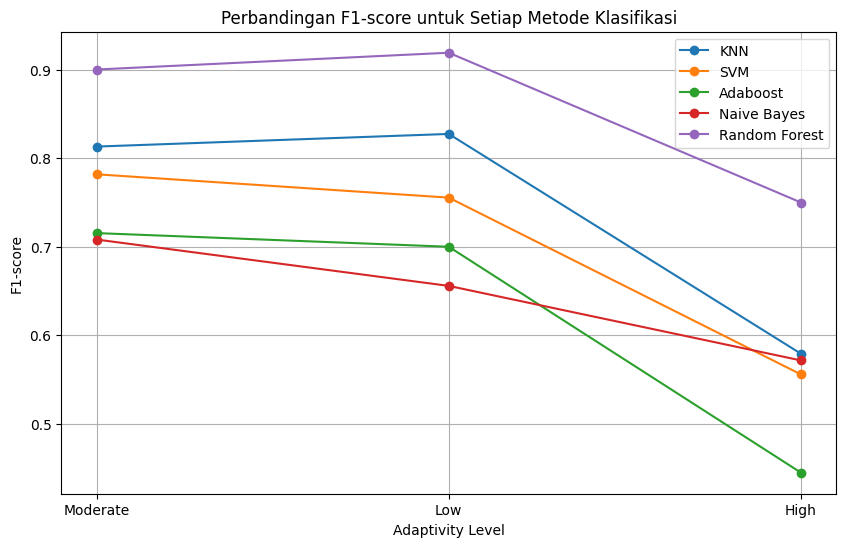

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

reports = {
    'KNN': classification_report(y_test_labels, y_pred_knn_labels, output_dict=True),
    'SVM': classification_report(y_test_labels, y_pred_svm_labels, output_dict=True),
    'Adaboost': classification_report(y_test_labels, y_pred_ada_labels, output_dict=True),
    'Naive Bayes': classification_report(y_test_labels, y_pred_nb_labels, output_dict=True),
    'Random Forest': classification_report(y_test_labels, y_pred_rf_labels, output_dict=True)
}

metric = 'f1-score'

values = {
    method: [reports[method][label][metric] for label in adaptivity_labels.values()] for method in reports
}

plt.figure(figsize=(10, 6))

for method, value in values.items():
    plt.plot(list(adaptivity_labels.values()), value, marker='o', label=method)

plt.xlabel('Adaptivity Level')
plt.ylabel(metric.capitalize())
plt.title(f'Perbandingan {metric.capitalize()} untuk Setiap Metode Klasifikasi')
plt.legend()
plt.grid()
plt.show()


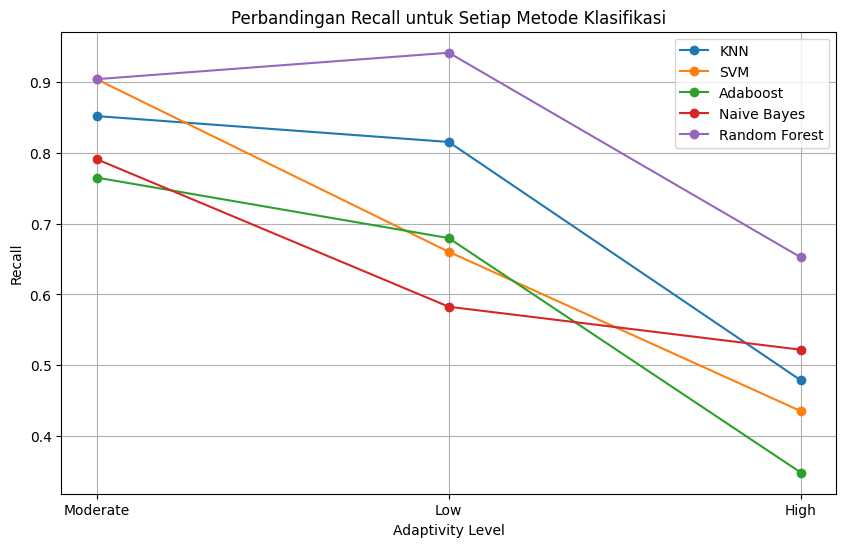

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

reports = {
    'KNN': classification_report(y_test_labels, y_pred_knn_labels, output_dict=True),
    'SVM': classification_report(y_test_labels, y_pred_svm_labels, output_dict=True),
    'Adaboost': classification_report(y_test_labels, y_pred_ada_labels, output_dict=True),
    'Naive Bayes': classification_report(y_test_labels, y_pred_nb_labels, output_dict=True),
    'Random Forest': classification_report(y_test_labels, y_pred_rf_labels, output_dict=True)
}

metric = 'recall'

values = {
    method: [reports[method][label][metric] for label in adaptivity_labels.values()] for method in reports
}

plt.figure(figsize=(10, 6))

for method, value in values.items():
    plt.plot(list(adaptivity_labels.values()), value, marker='o', label=method)

plt.xlabel('Adaptivity Level')
plt.ylabel(metric.capitalize())
plt.title(f'Perbandingan {metric.capitalize()} untuk Setiap Metode Klasifikasi')
plt.legend()
plt.grid()
plt.show()

Dari hasil evaluasi kelima model klasifikasi yang telah dilakukan, dapat disimpulkan bahwa Random Forest dan KNN merupakan dua model yang unggul dalam memprediksi kelas adaptivitas. Random Forest memiliki akurasi yang tinggi dan mampu memberikan hasil yang seimbang di tiap kelas. Di sisi lain, KNN juga menunjukkan kinerja yang baik dengan akurasi yang hampir sebanding dengan Random Forest, terutama dalam memprediksi kelas 'Low' dan 'Moderate'. Sementara itu, model Naive Bayes, Adaboost, dan SVM menunjukkan performa yang relatif kurang baik dalam beberapa aspek, seperti kesulitan dalam memprediksi kelas tertentu atau memiliki nilai F1-score yang rendah pada beberapa kelas.

# **5. Optimasi Model**

Optimasi Model- Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (Best Random Forest): {accuracy_best}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy (Best Random Forest): 0.8921161825726142


Optimasi Model- KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_knn_model = grid_search.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)

accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Accuracy (Best KNN): {accuracy_best_knn}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy (Best KNN): 0.9087136929460581


Dari hasil optimasi model yang telah dilakukan, dapat disimpulkan bahwa setelah tuning parameter dengan GridSearchCV:

1.   **Random Forest**

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}.

Accuracy (Best Random Forest): 0.8921161825726142
2.   **K-Nearest Neighbors (KNN)**

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}

Accuracy (Best KNN): 0.9087136929460581

-> Dalam hal akurasi, KNN mendapat skor akurasi yang sedikit lebih tinggi dibandingkan dengan Random Forest setelah dilakukan optimasi. Meskipun perbedaannya tidak terlalu besar, hasil GridSearchCV menunjukkan bahwa parameter yang dioptimalkan untuk KNN menghasilkan model yang sedikit lebih baik daripada parameter yang dioptimalkan untuk Random Forest berdasarkan akurasi.

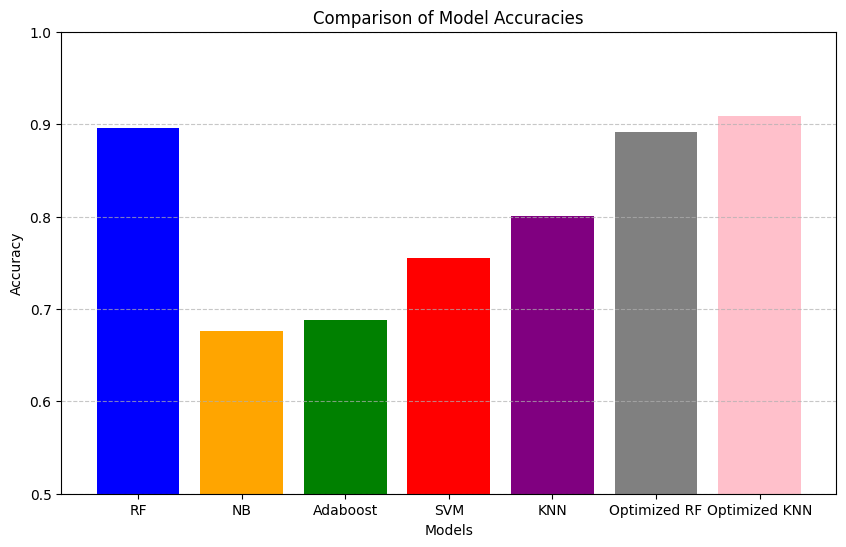

In [ ]:
models = ['RF', 'NB', 'Adaboost', 'SVM', 'KNN', 'Optimized RF', 'Optimized KNN']
accuracies = [0.896, 0.676, 0.688, 0.755, 0.801, 0.892, 0.909]

plt.figure(figsize=(10, 6))

plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'gray', 'pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()